In [1]:
from tamkin import *
from molmod import *

import matplotlib.pyplot as plt
import numpy
import re

import sys
sys.path.insert(0, '../code/')
from tamkin_multi_fidelity import *

sys.path.insert(-1, '/home/derwer/Desktop/PHD/QM_ThermoKolloq22_multifidelity/')
from tamkintools import *
    
import os 
from datetime import date

### PI example utilizing Multi-Fidelity models

- The data are read in, normalized and a multi fidelity model is derived based on the weights. In addition, the periodicity of Rotor Experiments is exploited.
- Afterwards the multi fidelity model can be initialized. This includes the selection of the kernel. There is potential for optimization here. The default RBF kernel oscillates relatively strongly (especially when noise in training data is fixed to small numbers). Therefore in physical applications often Matern kernels are used, since these have smoother samples. Especially when derivatives of functions are to be determined.
- after initialization hyperparameters can be fixed 
- then the model is trained
- after training the high fidelity output is used to overwrite the initial data in the tamkin object
- tamkintools is used with the new data, weights are not necessary anymore




In [2]:
#############
# Constants #
#############
R = 8.3144598
R_a = 8.3144598
kcal = 4.1868 # kJ

level_prec = 200
T_plot     = 1
ExtRotSym  = 1

PIa            = load_molecule_g03fchk("scan_data/PI/PIafreq.fchk")
PIb            = load_molecule_g03fchk("scan_data/PI/PIbfreq.fchk")

scanPI         = load_rotscan_g03log("scan_data/PI/scan_PIa_p_repl.log")
angles, energies = scanPI.potential 
scanPI_corrected = erase_point_scan(scanPI,12)
corrected_angles, corrected_energies = scanPI_corrected.potential
print('angles in the orig_scan is: ' + str(angles))
ref_energy = min(energies)
print('ref energy in script is : ' +str(ref_energy))
#erased_angle = angles[12]
#erased_energies = energies[12]
#erase_potential = [erased_angles, erased_energies] 
angles, energies = scanPI_corrected.potential
print('the angles in corrected scan is: ' + str(corrected_angles))
erased_point = erase_point(scanPI, 12)
print('erased_points are in the script: ' +str(erased_point))
nma_PIa        = NMA(PIa, ConstrainExt())
nma_PIb        = NMA(PIb, ConstrainExt())

nma_angle = dihed_angle(nma_PIa.coordinates[scanPI_corrected.dihedral])[0]
ref_energy = potential_reference(scanPI, nma_angle)
print('ref energy is: ' +str(ref_energy)) 
scan_PIhigh = add_point(scanPI_corrected, -150.69257/180.0*numpy.pi, 3.08/2625.4995+ref_energy) #TShigh
scan_PIlow  = add_point(scan_PIhigh,         1.20334/180.0*numpy.pi, 1.04/2625.4995+ref_energy) #TSlow
scan_PI2    = add_point(scan_PIlow,        -33.81733/180.0*numpy.pi, 0.37/2625.4995+ref_energy) #TSlow
scan_PI3    = add_point(scan_PI2,           65.75423/180.0*numpy.pi, 0.00/2625.4995+ref_energy) #TSlow


myadded_points = [[-150.69257/180.0*numpy.pi,
		      1.20334/180.0*numpy.pi,
		    -33.81733/180.0*numpy.pi,
		     65.75423/180.0*numpy.pi],
                  [3.08/2625.4995+ref_energy,
		   1.04/2625.4995+ref_energy,
		   0.37/2625.4995+ref_energy,
		   0.00/2625.4995+ref_energy]]


myweights = [0.02 for i in range(24)]
myweights[12] = 0.0
myweights.append(100)
myweights.append(100)
myweights.append(100)
myweights.append(100)


myderivativevalues  = [0.0 for i in range(4)]
#myderivatepostition = [numpy.pi/180*180,numpy.pi/180*59.25,numpy.pi/180*37.69,37.69/180*95.11]
myderivatepostition = [-150.69257/180.0*numpy.pi,
		          1.20334/180.0*numpy.pi,
		        -33.81733/180.0*numpy.pi,
		         65.75423/180.0*numpy.pi]
myderivateweights = [0.1 for i in range(len(myderivatepostition))]
myderivative = [myderivativevalues,myderivatepostition,myderivateweights]

angles in the orig_scan is: [ 1.1476278   1.40942797  1.67122639  1.93302725  2.19482396  2.45662461
  2.7184251   2.98022019 -3.04115906 -2.77936506 -2.51756264 -2.25576694
 -1.99396468 -1.73216472 -1.47036585 -1.20856436 -0.94676699 -0.68496738
 -0.42317072 -0.16136472  0.10042949  0.36223282  0.62402719  0.88582707
  1.14762869]
ref energy in script is : -384.815763515
the angles in corrected scan is: [ 1.1476278   1.40942797  1.67122639  1.93302725  2.19482396  2.45662461
  2.7184251   2.98022019 -3.04115906 -2.77936506 -2.51756264 -2.25576694
 -1.73216472 -1.47036585 -1.20856436 -0.94676699 -0.68496738 -0.42317072
 -0.16136472  0.10042949  0.36223282  0.62402719  0.88582707  1.14762869]
erased_potential in combine_scans are: [[-1.9939646802173705], [-384.391592515]]
erased_points are in the script: [[-1.9939646802173705], [-384.391592515]]
ref energy is: -384.815763515


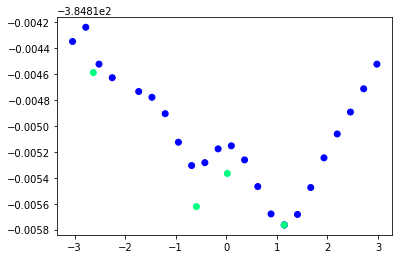

In [3]:
# plot scan data with weights
a, b = scan_PI3.potential
plt.scatter(a,b, c=myweights, cmap="winter")

zero weights excluded
number of fidelities: 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1.]
angle range: 6.0213792552986725
set angle range 6.283185307179586


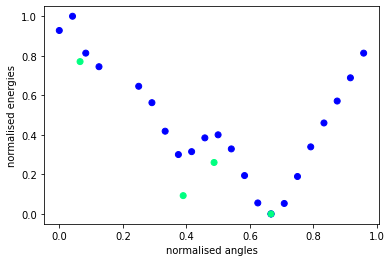

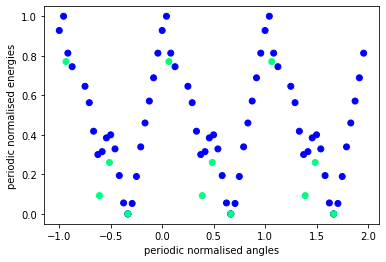

(81, 2)
(81, 1)
Optimization restart 1/5, f = -106.94294172837611
Optimization restart 2/5, f = -106.94294172541325
Optimization restart 3/5, f = -106.94294172851129
Optimization restart 4/5, f = -106.94294171344559
Optimization restart 5/5, f = -106.94294172885176


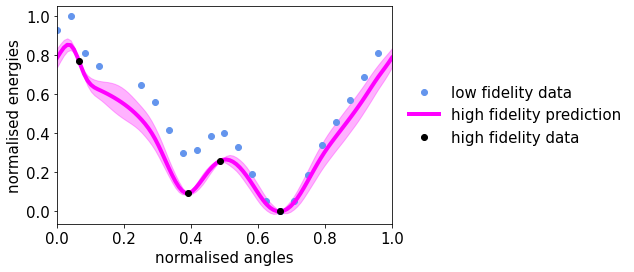

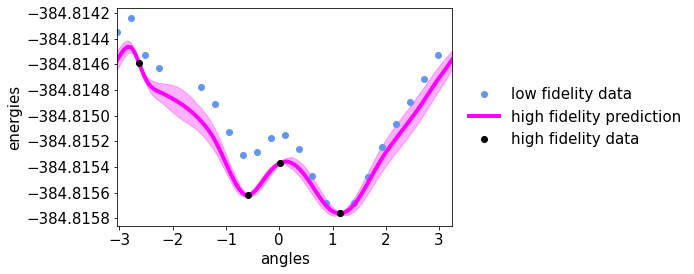

gp.,value,constraints,priors
multifidelity.Mat32.variance,0.32732318612313527,+ve,
multifidelity.Mat32.lengthscale,0.3339575305537974,+ve,
multifidelity.Mat32_1.variance,0.005820685810501394,+ve,
multifidelity.Mat32_1.lengthscale,0.12729212051324335,+ve,
multifidelity.scale,0.818947602326388,,
mixed_noise.Gaussian_noise.variance,1e-07,+ve fixed,
mixed_noise.Gaussian_noise_1.variance,1e-07,+ve fixed,


In [4]:

# initialize tamkin multi fidelity
tmf = tamkin_multi_fidelity( a, b, myweights, angle_range=2*np.pi)
# initialize multi fidelity model
# the default kernel is the RBF Kernel.
# https://gpy.readthedocs.io/en/deploy/GPy.kern.html
#tmf.multi_fidelity()
tmf.multi_fidelity(kernel=GPy.kern.Matern32)

# adjust hyperparameters and so on before model is trained
tmf.lin_mf_model.gpy_model.mixed_noise.Gaussian_noise.fix(0.0000001)
tmf.lin_mf_model.gpy_model.mixed_noise.Gaussian_noise_1.fix(0.0000001)

# train multi fidelity model
tmf.train()
#plot results
tmf.plot_normed_results("normalised_multi_fidelity")
tmf.plot_results("multi_fidelity")

tmf.lin_mf_model.gpy_model


In [5]:
# predict values for initial datapoints
normed_angles = np.sort(tmf.normed_angles)
mf_angles, mf_energy, mf_std = tmf.predict_hf(normed_angles)

# overwrite initial datapoints with multi fidelity results
scan_PI3.potential = np.array( [mf_angles, mf_energy]  )

ref_energies are: -384.8157635152595
relative energies in kjmol are: -384.8157635152595
relative enrgies are: [0.424171]
Erased energies are: [-384.391592515]
length of erased Points are: 1
erased angles in for loop are: 245.75423932539184
erased angles in for loop are: 1113.6607120898063
residence probability between 0.021002245020948565 and -2.630081504792031 at energy level 0 is: 1.526995647785575e-05
residence probability between -2.630081504792031 and 0.021002245020948565 at energy level 0 is: 0.9999847300435224
residence probability between 0.021002245020948565 and -2.630081504792031 at energy level 1 is: 5.379358265321923e-13
residence probability between -2.630081504792031 and 0.021002245020948565 at energy level 1 is: 0.9999999999994625
residence probability between 0.021002245020948565 and -2.630081504792031 at energy level 2 is: 0.9999806526194397
residence probability between -2.630081504792031 and 0.021002245020948565 at energy level 2 is: 1.934738056010649e-05
residence p

Boltzmann factor for energy 7 of 1.049107268505975 kJ/mol amounts to 0.6549288645977963
Residence probability at energy level 8
Boltzmann factor for energy 8 of 1.1304176491275053 kJ/mol amounts to 0.6337943691410289
Residence probability at energy level 9
Boltzmann factor for energy 9 of 1.2316023940001701 kJ/mol amounts to 0.6084439676685763
Residence probability at energy level 10
Boltzmann factor for energy 10 of 1.328082983202552 kJ/mol amounts to 0.5852170643751003
Residence probability at energy level 11
Boltzmann factor for energy 11 of 1.4333140225780894 kJ/mol amounts to 0.5608933292623564
Residence probability at energy level 12
Boltzmann factor for energy 12 of 1.5376090674734293 kJ/mol amounts to 0.5377836035465919
Residence probability at energy level 13
Boltzmann factor for energy 13 of 1.6416918716859477 kJ/mol amounts to 0.5156701871217173
Residence probability at energy level 14
Boltzmann factor for energy 14 of 1.7443648663476403 kJ/mol amounts to 0.49474736810000697

Boltzmann factor for energy 70 of 8.893059870901302 kJ/mol amounts to 0.027664105048338893
Residence probability at energy level 71
Boltzmann factor for energy 71 of 9.318797426431502 kJ/mol amounts to 0.023298420647461047
Residence probability at energy level 72
Boltzmann factor for energy 72 of 9.318797426434505 kJ/mol amounts to 0.023298420647432823
Residence probability at energy level 73
Boltzmann factor for energy 73 of 9.756740972449656 kJ/mol amounts to 0.019525304841964727
Residence probability at energy level 74
Boltzmann factor for energy 74 of 9.756740972450464 kJ/mol amounts to 0.01952530484195837
Residence probability at energy level 75
Boltzmann factor for energy 75 of 10.206873000900584 kJ/mol amounts to 0.016282973480286313
Residence probability at energy level 76
Boltzmann factor for energy 76 of 10.206873000900794 kJ/mol amounts to 0.01628297348028494
Residence probability at energy level 77
Boltzmann factor for energy 77 of 10.669178388176531 kJ/mol amounts to 0.013

Boltzmann factor for energy 131 of 27.72730975488701 kJ/mol amounts to 1.387123729680987e-05
Residence probability at energy level 132
Boltzmann factor for energy 132 of 27.72730975488705 kJ/mol amounts to 1.3871237296809648e-05
Residence probability at energy level 133
Boltzmann factor for energy 133 of 28.528125444287554 kJ/mol amounts to 1.0041776611824898e-05
Residence probability at energy level 134
Boltzmann factor for energy 134 of 28.528125444287593 kJ/mol amounts to 1.0041776611824737e-05
Residence probability at energy level 135
Boltzmann factor for energy 135 of 29.341000045091953 kJ/mol amounts to 7.234244170803539e-06
Residence probability at energy level 136
Boltzmann factor for energy 136 of 29.341000045091985 kJ/mol amounts to 7.234244170803435e-06
Residence probability at energy level 137
Boltzmann factor for energy 137 of 30.165932838490832 kJ/mol amounts to 5.186365846381239e-06
Residence probability at energy level 138
Boltzmann factor for energy 138 of 30.165932838

Boltzmann factor for energy 192 of 56.9954616568795 kJ/mol amounts to 1.0334072807353555e-10
Residence probability at energy level 193
Boltzmann factor for energy 193 of 58.15786282071426 kJ/mol amounts to 6.465711348134492e-11
Residence probability at energy level 194
Boltzmann factor for energy 194 of 58.15786282071428 kJ/mol amounts to 6.465711348134447e-11
Residence probability at energy level 195
Boltzmann factor for energy 195 of 59.33231331828833 kJ/mol amounts to 4.0257800021257774e-11
Residence probability at energy level 196
Boltzmann factor for energy 196 of 59.33231331828838 kJ/mol amounts to 4.025780002125706e-11
Residence probability at energy level 197
Boltzmann factor for energy 197 of 60.518813037246225 kJ/mol amounts to 2.494438002823735e-11
Residence probability at energy level 198
Boltzmann factor for energy 198 of 60.51881303724624 kJ/mol amounts to 2.4944380028237172e-11
Residence probability at energy level 199
Boltzmann factor for energy 199 of 61.71736187085271

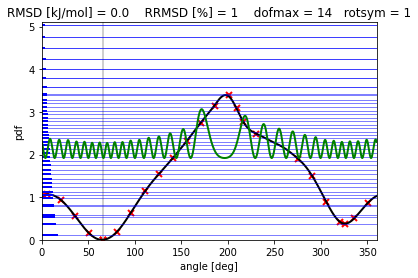

In [6]:
execute_tamkintools = False
if execute_tamkintools:
    #rotor          = Rotor(scanPI, PIa, rotsym=1, cancel_freq='scan', even=False, dofmax=10, num_levels=level_prec)
    #rotor          = Opt_Rotor(scan_PI3, PIa, rotsym=1, cancel_freq='scan', derivatives=myderivative, 
    #			   even=False, dofmax=14, num_levels=level_prec)
    rotor          = Opt_Rotor(scan_PI3, PIa, rotsym=1, cancel_freq='scan',
                   even=False, dofmax=14, num_levels=level_prec)

    # PartFun is part of tamkin!!!
    pf_PIa_HO      = PartFun(nma_PIa, [ExtTrans(), ExtRot(symmetry_number=ExtRotSym)])
    pf_PIb_HO      = PartFun(nma_PIb, [ExtTrans(), ExtRot(symmetry_number=ExtRotSym)])
    pf_PIa_HR      = PartFun(nma_PIa, [ExtTrans(), ExtRot(symmetry_number=ExtRotSym), rotor])

    pf_PIa_HO.write_to_file("PIa_HO.csv")
    pf_PIb_HO.write_to_file("PIb_HO.csv")
    pf_PIa_HR.write_to_file("PIa_HR_2.csv")
    #mypotential = self.rot_scan.potential
    rotor.plot_levels_all("PI_improved.png",T_plot,erased_points =erased_point,added_points = myadded_points)
    #rotor.plot_levels_all("PI_Optrotor_plotall_addederased.png",T_plot,erased_points =erased_point,added_points = myadded_points)

    thetas = np.asarray([1.20334,-150.69257])/180.0*numpy.pi

    #rotor.plot_P("PI",0)

    for i in range(30):
        rotor.plot_P("PI",i)
        P = rotor.residence_probability(thetas,i)
        for j in range(len(thetas)):
            print("residence probability between "+str(thetas[j])+" and "+str(thetas[j-1])+" at energy level "+str(i)+" is: "+str(P[j]))
    P = rotor.residence_probability_T(thetas,298.15)
    for j in range(len(thetas)):
        print("residence probability between "+str(thetas[j])+" and "+str(thetas[j-1])+" at temperature 298.15 Kelvin is: "+str(P[j]))

ref_energies are: -384.8157635152595
relative energies in kjmol are: -384.8157635152595
relative enrgies are: [0.424171]
Erased energies are: [-384.391592515]
length of erased Points are: 1
erased angles in for loop are: 245.75423932539184
erased angles in for loop are: 1113.6607120898063
ref_energies are: -384.8157635152595
relative energies in kjmol are: -384.8157635152595
relative enrgies are: [0.424171]
Erased energies are: [-384.391592515]
length of erased Points are: 1
erased angles in for loop are: 245.75423932539184
erased angles in for loop are: 1113.6607120898063


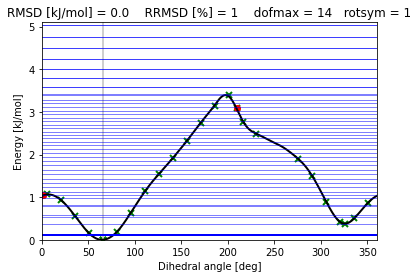

In [7]:
if execute_tamkintools:
    rotor.plot_levels_all("PI_fin.png",T_plot,erased_points =erased_point,added_points = myadded_points)
    rotor.plot_levels_all("PI_fin.pdf",T_plot,erased_points =erased_point,added_points = myadded_points)

## Standard GP

In [8]:
p = np.squeeze( np.where( tmf.periodic_fidelities == np.max(tmf.periodic_fidelities) ) )

ag = tmf.periodic_angles[p]
bg = tmf.periodic_energies[p]

kernel = GPy.kern.Matern32(1)
high_gp_model = GPy.models.GPRegression( np.atleast_2d( ag ).T, np.atleast_2d( bg ).T , kernel)
high_gp_model.Gaussian_noise.fix(0.0000001)

high_gp_model.optimize_restarts(5)

high_gp_model

Optimization restart 1/5, f = 5.3381187250125075
Optimization restart 2/5, f = 5.338118725011481
Optimization restart 3/5, f = 5.338118725013062
Optimization restart 4/5, f = 5.3381187250125075
Optimization restart 5/5, f = 5.338118725039507


GP_regression.,value,constraints,priors
Mat32.variance,0.1891783505556389,+ve,
Mat32.lengthscale,0.17339757868578884,+ve,
Gaussian_noise.variance,1e-07,+ve fixed,


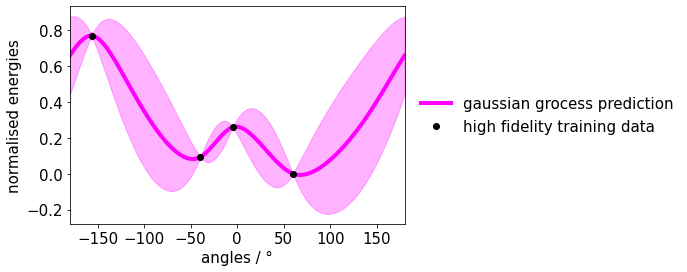

In [9]:
x_plot = np.atleast_2d( np.linspace(0,1,100) ).T
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)
hf_std_hf_gp_model = np.sqrt(hf_var_high_gp_model)

x_plot = np.squeeze(x_plot)
hf_mean_high_gp_model = np.squeeze(hf_mean_high_gp_model)#*tmf.energy_range + tmf.energy_min
hf_std_hf_gp_model = np.squeeze(hf_std_hf_gp_model)#*tmf.energy_range

ndummy = x_plot*360 -180 #np.pi

plt.plot(ndummy, hf_mean_high_gp_model,"-",label="gaussian grocess prediction",linewidth=tmf.lsize,color="magenta")
plt.fill_between(ndummy, hf_mean_high_gp_model-hf_std_hf_gp_model, hf_mean_high_gp_model+hf_std_hf_gp_model,
                 alpha=.3,color="magenta")

#plt.plot(ag*360-180, bg*tmf.energy_range + tmf.energy_min, ".k",label="high fidelity training data",markersize=tmf.msize)
plt.plot(ag*360-180, bg, ".k",label="high fidelity training data",markersize=tmf.msize)


#plt.plot(data_c['deg'].to_numpy(),data_c['E'].to_numpy(),"k--", label="high fidelity data")

plt.xlim( (-180,180) )
plt.xlabel("angles / °",fontsize=tmf.fsize)
plt.ylabel("normalised energies",fontsize=tmf.fsize)
plt.xticks(fontsize=tmf.fsize)     
plt.yticks(fontsize=tmf.fsize)     
plt.legend(fontsize=tmf.fsize,frameon=False,loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.savefig("gp_on_high_fidelity.png", bbox_inches='tight')
plt.savefig("gp_on_high_fidelity.pdf", bbox_inches='tight')